<a href="https://colab.research.google.com/github/geo-tp/053-Database-Frontend/blob/master/mnist_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Convnets

##Import

In [ ]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

##Dataset

In [ ]:
# DATASET - Images of 0 to 9 digits hand writted

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
train_labels = to_categorical(train_labels)

# Train set
partial_train_images = train_images[20000:]
partial_train_labels = train_labels[20000:]

# Validation set
val_images = train_images[:20000]
val_labels = train_labels[:20000]

# Test set
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
test_labels = to_categorical(test_labels)


11490434/11490434 [==============================] - 1s 0us/step


## Model

In [ ]:
# MODEL DEFINITION - this model should predict what digit image shows

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Training

In [ ]:
# TRAIN

history = model.fit(partial_train_images, partial_train_labels, validation_data=(val_images, val_labels), epochs=5, batch_size=64)

Epoch 1/5
625/625 [==============================] - 49s 76ms/step - loss: 0.2347 - accuracy: 0.9263 - val_loss: 0.1031 - val_accuracy: 0.9690
Epoch 2/5
625/625 [==============================] - 51s 81ms/step - loss: 0.0604 - accuracy: 0.9815 - val_loss: 0.0524 - val_accuracy: 0.9835
Epoch 3/5
625/625 [==============================] - 49s 78ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0473 - val_accuracy: 0.9865
Epoch 4/5
625/625 [==============================] - 45s 72ms/step - loss: 0.0298 - accuracy: 0.9902 - val_loss: 0.0379 - val_accuracy: 0.9888
Epoch 5/5
625/625 [==============================] - 39s 63ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0458 - val_accuracy: 0.9868


##Results

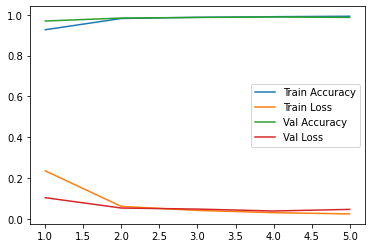

In [ ]:
# LOG TRAINING RESULTS

history_dict = history.history

loss = history_dict['loss']
acc = history_dict['accuracy']

val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']

epochs = range(1, 6)

plt.plot(epochs, acc, label="Train Accuracy")
plt.plot(epochs, loss, label="Train Loss")
plt.plot(epochs, val_acc, label="Val Accuracy")
plt.plot(epochs, val_loss, label="Val Loss")
plt.legend()
plt.show()

In [ ]:
# EVALUATION

score = model.evaluate(test_images, test_labels)
print(score)

313/313 [==============================] - 3s 9ms/step - loss: 0.0385 - accuracy: 0.9885
[0.03854614123702049, 0.9884999990463257]
